Exercises and code samples for the course Unsupervised and Reinforcement Learning (AAI-URL) in the Bachelor of AAI at Rosenheim University of Applied Sciences.

# n-Armed Bandits

This sample introduces the n-armed bandit problem, the conflict between exploration and exploitation, and several ways how to balance this conflict.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### The Problem defintion:
A typical slot machine is a device in which the player pulls a lever arm and receives rewards at some expected rate. Because the expected rate is typically negative, these machines are sometimes referred to as “one-armed bandits”. By analogy, a “multi-armed bandit” is a machine in which there are multiple lever arms to pull, each one of which may pay out at a different expected rate (= reward). 

The “multi-armed bandit” problem refers to the challenge of constructing a strategy for pulling the levers when one has no prior knowledge of the payout rate for any of the levers. Therefore, one must strike a balance between exploring each of the levers in order to determine their value, while exploiting one’s current knowledge in order to favor high paying levers.

### The Bandit Class
Let's define the bandit:

In [ ]:
class Bandit:
    def __init__(self, k):
        # k: number of bandit arms
        self.k = k
        
        # qstar: action values
        self.qstar = np.random.normal(size=k).round(2)
    
    def action(self, a):
        return np.random.normal(loc=self.qstar[a])
    
    def __str__(self):
        return np.array_str(self.qstar)

print(Bandit(10))

[-0.86  1.51 -0.02  0.92 -2.51  0.32 -0.98  0.09  0.72 -1.13]


The greed action selection algorithm

In [ ]:
def greedy_action_selection(k, numsteps):
    # k: number of bandit arms
    # numsteps: number of steps (repeated action selections)
    
    # Apossible[t]: list of possible actions at step t
    Apossible = {}
    
    # A[t]: action selected at step t
    A = np.zeros((numsteps,))
    
    # N[a,t]: the number of times action a was selected 
    #         in steps 0 through t-1
    N = np.zeros((k,numsteps+1))
    
    # R[t]: reward at step t
    R = np.zeros((numsteps,))
    
    # Q[a,t]: estimated value of action a at step t
    Q = np.zeros((k,(numsteps+1)))

    # Initialize bandit
    bandit = Bandit(k)

    for t in range(numsteps):

        # Select greedy actions as possible actions
        Apossible[t] = np.argwhere(Q[:,t] == np.amax(Q[:,t])).flatten()

        # Select action randomly from possible actions
        a = Apossible[t][np.random.randint(len(Apossible[t]))]

        # Record action taken
        A[t] = a

        # Perform action (= sample reward)
        R[t] = bandit.action(a)

        # Update action counts
        N[:,t+1] = N[:,t]
        N[a,t+1] += 1

        # Update action value estimates, incrementally
        if N[a,t] > 0:
            Q[:,t+1] = Q[:,t]
            Q[a,t+1] = Q[a,t] + (R[t] - Q[a,t]) / N[a,t]
        else:
            Q[:,t+1] = Q[:,t]
            Q[a,t+1] = R[t]

        #Q[:,t] = np.around(Q:t], decimals=2)
    return {'bandit': bandit, 
            'Apossible': Apossible, 
            'A': A, 'N' : N, 'R' : R, 'Q' : Q}

### Single run

In [ ]:
k = 10
numsteps = 5

bandit_task = greedy_action_selection(k, numsteps)

print('Bandit Q: %s' % bandit_task['bandit'])
print('Action a: %s' % bandit_task['A'])
print('Reward r: %s' % bandit_task['R'])
print('Est    Q:')
print('%s' %bandit_task['Q'])

Bandit Q: [ 0.11 -0.23  0.75 -0.5  -1.94 -0.99 -0.63  1.45 -0.09 -1.52]
Action a: [1. 1. 1. 1. 1.]
Reward r: [ 0.2804429   0.12814732  0.58520543 -0.65759062  0.25184305]
Est    Q:
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.2804429  0.12814732 0.35667637 0.01858738 0.0769013 ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


### Conversation over 500 plays

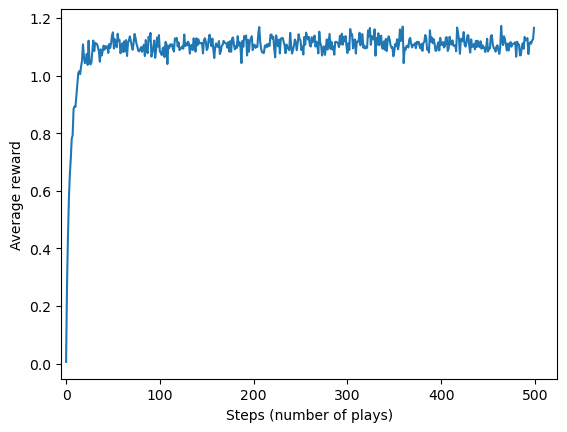

In [ ]:
k = 10
numsteps = 500
numtasks = 2000

avgR = np.zeros((numsteps, ))
for task in range(numtasks):
    bandit_task = greedy_action_selection(k,numsteps)
    avgR += bandit_task['R']
avgR /= numtasks

plt.plot(avgR) ;
plt.ylabel('Average reward') ;
plt.xlabel('Steps (number of plays)') ;
plt.xlim(-5) ;